# Iris Classification

The dataset used is gotten from [UCI Machine Learning Respository](https://archive.ics.uci.edu/dataset/53/iris). The goal of the project is to predict the class of an iris flower based on its sepal length, sepal width, petal length and petal width.



## **DAY ONE**: **Exploring a Dataset**

## Importing the Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## Data Importation

In this section, we will be importing our dataset and performing data cleaning to fix missing values, outliers and conduct further analysis.

In [2]:
#using pandas as pd
data = pd.read_csv("/workspaces/ECX-4.0-21-Days-Data-Science-Challenge/bezdekIris.data")

In [3]:
#getting the first 5 content of our data
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
#getting the shape
data.shape

(149, 5)

In [5]:
#getting the information summary on our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
#checking to see if we have missing values in our dataset
data.isnull().sum()

5.1            0
3.5            0
1.4            0
0.2            0
Iris-setosa    0
dtype: int64

Fortunately we have no missing values if we did we will have to use the SimpleImputer from the scikit-learn library to fill up our missing values. 
`from sklearn.impute import SimpleImputer`

## **DAY TWO**: **Exploring a Dataset**

Below are the names of each column: 5.1 : Sepal Length 3.5: Sepal Width 1.4: Petal Length 0.2: Petal Width

In the next cell of code will be changing the names


In [7]:
#map for new column names
new_col_names = {
    "5.1": "Sepal_length",
    "3.5": "Sepal_width",
    "1.4": "Petal_length",
    "0.2": "Petal_width"
}

In [8]:
# Rename columns using the rename() function
data.rename(columns=new_col_names, inplace=True)

In [9]:
#checking to confirm changes
data.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [10]:
#getting the statistics summary on our dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sepal_length,149.0,5.848322,0.828594,4.3,5.1,5.8,6.4,7.9
Sepal_width,149.0,3.054362,0.435810,2.0,2.8,3.0,3.3,4.4
Petal_length,149.0,3.773826,1.760543,1.0,1.6,4.4,5.1,6.9
Petal_width,149.0,1.206040,0.760354,0.1,0.3,1.3,1.8,2.5


Since we are dealing with numerical features that are different in terms of scale, I will be using the standard scaler from sklearn to standardize our features so that they have a common mean of 0 and standard deviation of one 

In [11]:
data.dtypes

Sepal_length    float64
Sepal_width     float64
Petal_length    float64
Petal_width     float64
Iris-setosa      object
dtype: object

In [12]:
#checking the distribution of our features
for col in data.columns:
    print(data[col].value_counts())

Sepal_length
5.0    10
6.3     9
6.7     8
5.1     8
5.7     8
5.8     7
5.5     7
6.4     7
5.6     6
5.4     6
6.1     6
6.0     6
4.9     6
6.5     5
4.8     5
6.2     4
7.7     4
6.9     4
5.2     4
4.6     4
4.4     3
5.9     3
7.2     3
6.8     3
4.7     2
6.6     2
4.3     1
7.0     1
4.5     1
7.1     1
7.6     1
7.3     1
5.3     1
7.4     1
7.9     1
Name: count, dtype: int64
Sepal_width
3.0    26
2.8    14
3.2    13
3.4    12
3.1    11
2.9    10
2.7     9
2.5     8
3.3     6
3.8     6
3.5     5
2.6     5
2.3     4
3.6     4
3.7     3
2.4     3
2.2     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: count, dtype: int64
Petal_length
1.5    13
1.4    12
5.1     8
4.5     8
1.6     7
1.3     7
5.6     6
4.7     5
4.9     5
4.0     5
4.2     4
5.0     4
4.4     4
4.8     4
1.7     4
3.9     3
4.6     3
5.7     3
4.1     3
5.5     3
6.1     3
5.8     3
3.3     2
5.4     2
6.7     2
5.3     2
5.9     2
6.0     2
1.2     2
4.3     2
1.9     2
3.5     2
5.2     2


In [13]:
#initializing our standard scaler
scaler = StandardScaler()

In [14]:
#getting our numeric features only
numeric_features = [column for column in data.columns if data[column].dtypes in ["float64","int64"]]

In [15]:
numeric_features

['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width']

In [16]:
#fitting and transforming our numeric features
num_scaled = scaler.fit_transform(data[numeric_features])

In [18]:
#accessing our scaled features into a DataFrame
scaled_df = pd.DataFrame(num_scaled, columns=numeric_features)

In [19]:
scaled_df.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width
0,-1.148356,-0.125160,-1.352896,-1.327583
1,-1.390542,0.335304,-1.409888,-1.327583
2,-1.511636,0.105072,-1.295904,-1.327583
3,-1.027262,1.256231,-1.352896,-1.327583
4,-0.542889,1.946927,-1.181919,-1.063660


## **DAY THREE**: **Exploratory Data Analysis**

I will be performing univariate, bivariate and correlation analysis on my dataset.

In [20]:
#combining the scaled features with my original dataframe and dropping the previous ones
new_data = pd.concat([scaled_df,data.select_dtypes(exclude=['float64', 'int64'])], axis = 1)

In [21]:
new_data.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Iris-setosa
0,-1.148356,-0.125160,-1.352896,-1.327583,Iris-setosa
1,-1.390542,0.335304,-1.409888,-1.327583,Iris-setosa
2,-1.511636,0.105072,-1.295904,-1.327583,Iris-setosa
3,-1.027262,1.256231,-1.352896,-1.327583,Iris-setosa
4,-0.542889,1.946927,-1.181919,-1.063660,Iris-setosa


**Univariate Analysis**

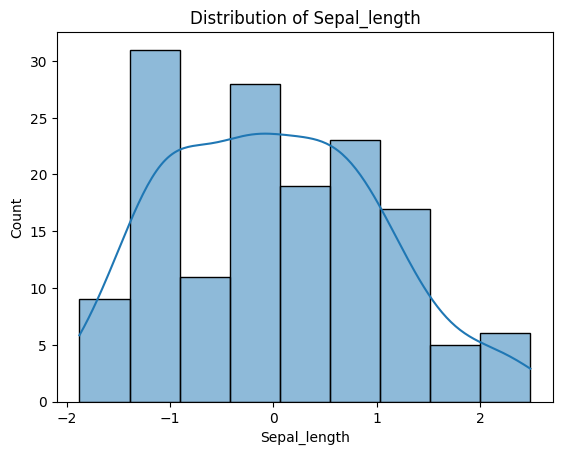

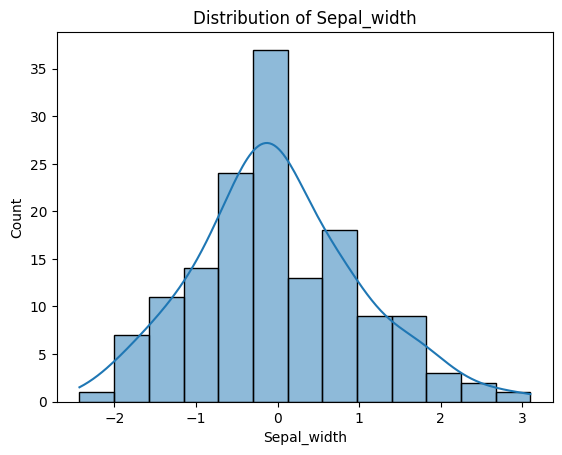

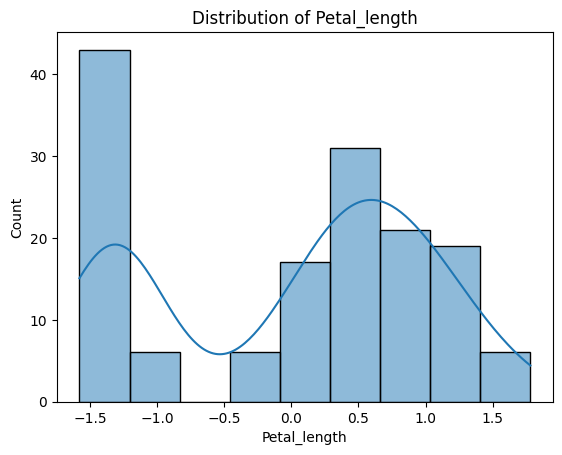

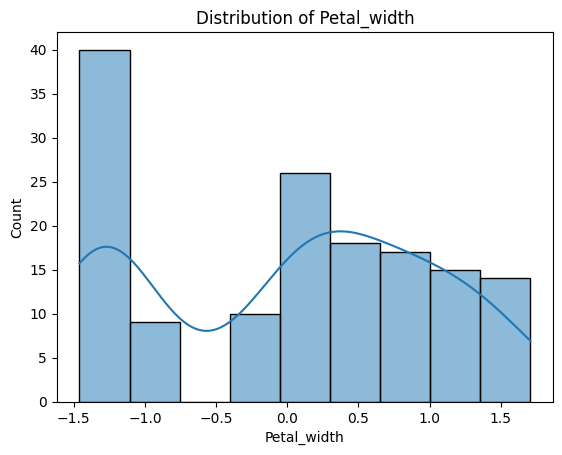

In [22]:
#visualizing the numeric features in our dataset
df = new_data.drop("Iris-setosa", axis = 1)
for col in df.columns:
    sns.histplot(data = df, x = col, kde = True)
    plt.title(f"Distribution of {col}")
    plt.show();

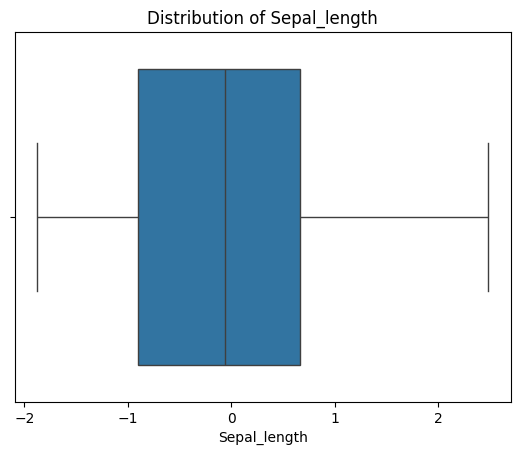

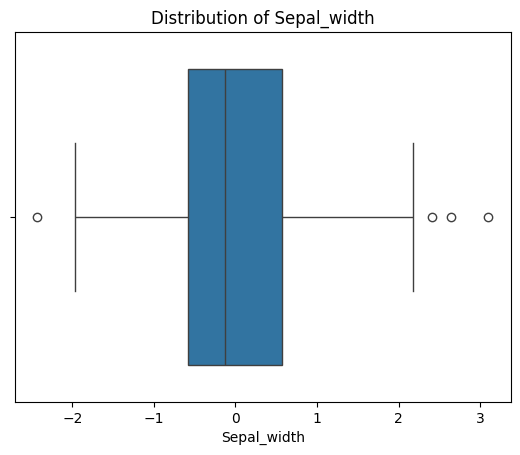

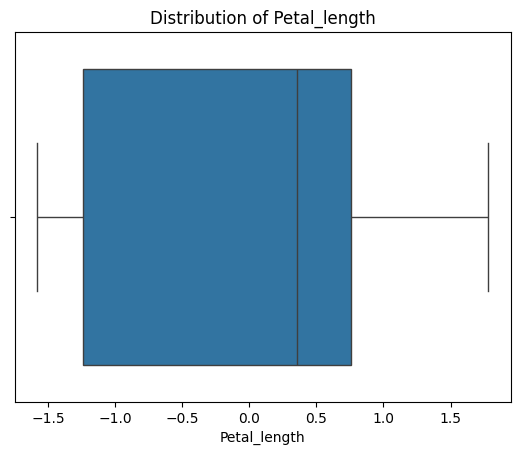

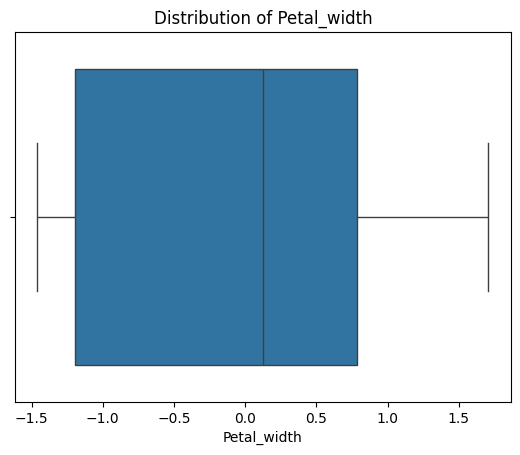

In [23]:
#using a boxplot to check for outliers
for col in df.columns:
    sns.boxplot(data = df, x = col)
    plt.title(f"Distribution of {col}")
    plt.show();